In [1]:
import numpy as np

In [2]:
results = np.load('/home/storage/hans/jax_reco_new/examples/reco_result_tfrecord_n_pulses5.npy')

In [3]:
def GreatCircleDistance(azi_1, zen_1, azi_2, zen_2):
        ra_1 = azi_1
        ra_2 = azi_2
        dec_1 = np.pi/2.0 - zen_1
        dec_2 = np.pi/2.0 - zen_2
        '''Compute the great circle distance between two events'''
        '''All coordinates must be given in radians'''
        delta_dec = np.abs(dec_1 - dec_2)
        delta_ra = np.abs(ra_1 - ra_2)
        x = (np.sin(delta_dec / 2.))**2. + np.cos(dec_1) *\
            np.cos(dec_2) * (np.sin(delta_ra / 2.))**2.
        return 2. * np.arcsin(np.sqrt(x))

In [4]:
scale = 20.0
reco_zenith, reco_azimuth = results[:, -5]/scale, results[:, -4]/scale

In [5]:
track_src_v = results[:, 2:4]
true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]

In [6]:
gcd = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, reco_azimuth, reco_zenith))
gcd_smpe = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, smpe_azimuth, smpe_zenith))

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'tpn_spe1st [deg]')

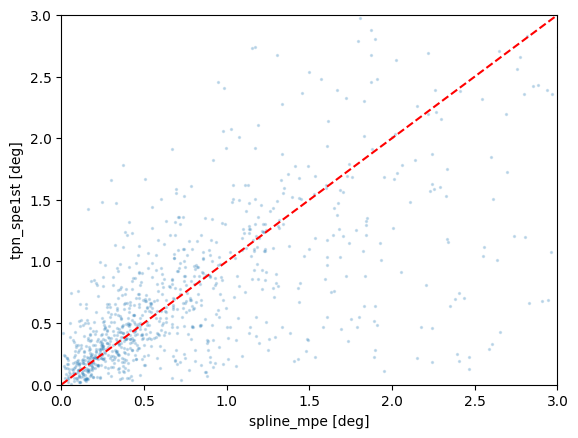

In [8]:
plt.scatter(gcd_smpe, gcd, s=2, alpha=0.2)
plt.xlim([0.0, 3.0])
plt.ylim([0.0, 3.0])
plt.plot([0.0, 3.0], [0.0, 3.0], "r--")
plt.xlabel("spline_mpe [deg]")
plt.ylabel("tpn_spe1st [deg]")

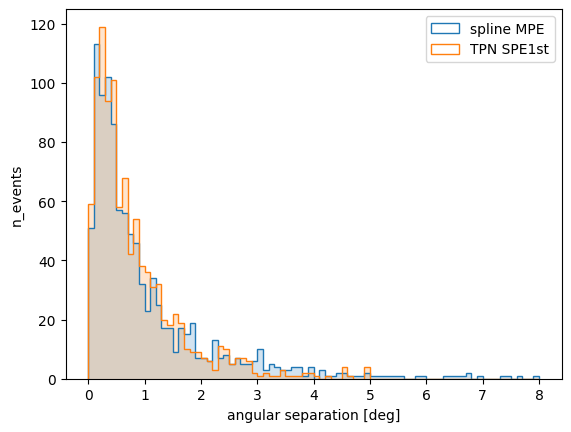

In [9]:
fig, ax = plt.subplots()
bins = np.linspace(0.0, 8.0, 81)
ax.hist(gcd_smpe, bins=bins, histtype='step', color='tab:blue', label='spline MPE')
ax.hist(gcd_smpe, bins=bins, color='tab:blue', alpha=0.2)
ax.hist(gcd, bins=bins, histtype='step', color='tab:orange', label='TPN SPE1st')
ax.hist(gcd, bins=bins, color='tab:orange', alpha=0.2)
ax.set_xlabel("angular separation [deg]")
ax.set_ylabel("n_events")
ax.legend()
plt.show()

In [10]:
print(np.median(gcd))

0.5635370599766767


In [11]:
print(np.median(gcd_smpe))

0.6182653098639846
